In [25]:
import json
import numpy as np
from zxcvbn import zxcvbn
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
with open('preanalysis-data.json') as data_file:    
    # 1. replace instances of `][` with `]<SPLIT>[`
    # (`<SPLIT>` needs to be something that is not present anywhere in the file to begin with)

    raw_data = data_file.read()  # we're going to need the entire file in memory
    tweaked_data = raw_data.replace('}{', '}<SPLIT>{')

    # 2. split the string into an array of strings, using the chosen split indicator

    split_data = tweaked_data.split('<SPLIT>')

    # 3. load each string individually

    parsed_data = [json.loads(bit_of_data) for bit_of_data in split_data]

In [38]:
data = np.array(parsed_data[0])

In [39]:
print(data)

[ {'rankedPasswords': [{'realScore': 4, '_id': '', 'password': 'silambarasan', 'userScore': 4}, {'realScore': 0, '_id': '', 'password': 'missing', 'userScore': 0}, {'realScore': 1, '_id': '', 'password': 'amber99', 'userScore': 3}, {'realScore': 3, '_id': '', 'password': 'pinkpunk1', 'userScore': 2}, {'realScore': 2, '_id': '', 'password': 'jimjim2', 'userScore': 1}], 'personalities': {'extraversion': 75, 'intellect': 95, 'neuroticism': 50, 'conscientiousness': 90, 'agreeableness': 85}, 'questionnaire': {'password_awareness_level': 5, 'gender': 'female', 'computer_skills_level': 5, 'age': '40-', 'occupation': 'Computer Science and IT-related Occupations', 'handedness': 'right', 'password_awareness': 'yes', 'security_training': 'yes', 'account_hijacking_involvement': 'no'}, 'userAwakeAnswers': [{'question': 'I enjoy watching sports', 'answer': 'Neither Inaccurate nor Accurate', '_id': ''}, {'question': 'I enjoy watching the following sport the most', 'answer': 'Hockey', '_id': ''}, {'qu

In [40]:
# pretty print
print(json.dumps(data[0], indent=4))

{
    "rankedPasswords": [
        {
            "realScore": 4,
            "_id": "",
            "password": "silambarasan",
            "userScore": 4
        },
        {
            "realScore": 0,
            "_id": "",
            "password": "missing",
            "userScore": 0
        },
        {
            "realScore": 1,
            "_id": "",
            "password": "amber99",
            "userScore": 3
        },
        {
            "realScore": 3,
            "_id": "",
            "password": "pinkpunk1",
            "userScore": 2
        },
        {
            "realScore": 2,
            "_id": "",
            "password": "jimjim2",
            "userScore": 1
        }
    ],
    "personalities": {
        "extraversion": 75,
        "intellect": 95,
        "neuroticism": 50,
        "conscientiousness": 90,
        "agreeableness": 85
    },
    "questionnaire": {
        "password_awareness_level": 5,
        "gender": "female",
        "computer_skills_leve

In [41]:
# get singular data
print(data[0]['personalities'])

{'extraversion': 75, 'intellect': 95, 'neuroticism': 50, 'conscientiousness': 90, 'agreeableness': 85}


In [42]:
# put all personalities into a dictionary to graph
personalities = { "extraversion": [], "intellect": [], "neuroticism": [], "conscientiousness": [], "agreeableness": [] }

for i in range(len(data)):
    personalities["extraversion"].append(data[i]["personalities"]["extraversion"])
    personalities["intellect"].append(data[i]["personalities"]["intellect"])
    personalities["neuroticism"].append(data[i]["personalities"]["neuroticism"])
    personalities["conscientiousness"].append(data[i]["personalities"]["conscientiousness"])
    personalities["agreeableness"].append(data[i]["personalities"]["agreeableness"])
    
print(personalities)

{'extraversion': [75, 100, 30, 100, 75, 70, 60, 80, 35, 95], 'intellect': [95, 90, 75, 95, 85, 80, 100, 90, 65, 70], 'neuroticism': [50, 45, 55, 90, 30, 60, 85, 35, 50, 50], 'conscientiousness': [90, 60, 95, 95, 65, 70, 50, 65, 55, 90], 'agreeableness': [85, 90, 60, 95, 60, 70, 90, 80, 30, 70]}


# CREATION

In [90]:
createdPasswords = { "bank": [], "email": [] }

for i in range(len(data)):
    # remove whitespace from front and back
    # data[i]['bank-password-creation']['score'] = zxcvbn(data[i]['bank-password-creation']['password'].strip())['score']
    # data[i]['email-password-creation']['score'] = zxcvbn(data[i]['email-password-creation']['password'].strip())['score']
    data[i]['bank-password-creation']['score'] = zxcvbn(data[i]['bank-password-creation']['password'])['score']
    data[i]['email-password-creation']['score'] = zxcvbn(data[i]['email-password-creation']['password'])['score']
    
    createdPasswords["bank"].append(data[i]['bank-password-creation']["score"])
    createdPasswords["email"].append(data[i]['email-password-creation']["score"])
    
    print(data[i]['bank-password-creation'])
    print(data[i]['email-password-creation'])

{'leak': '', '_id': None, 'justification': None, 'password': 'OrangeWater258', 'score': 3}
{'leak': '', '_id': None, 'justification': None, 'password': 'BananaIron729', 'score': 3}
{'leak': '', '_id': None, 'justification': None, 'password': '5@v@Na4!', 'score': 2}
{'leak': '', '_id': None, 'justification': None, 'password': 'Slamash0522', 'score': 4}
{'leak': '', '_id': None, 'justification': None, 'password': 'hg5dMk~u', 'score': 2}
{'leak': '', '_id': None, 'justification': None, 'password': 'hg5dMk~u', 'score': 2}
{'leak': '', '_id': None, 'justification': None, 'password': 'bananaboat25', 'score': 3}
{'leak': '', '_id': None, 'justification': None, 'password': 'bananaboat25', 'score': 3}
{'leak': '', '_id': None, 'justification': None, 'password': 'Opt1mu$Pr1m3', 'score': 4}
{'leak': '', '_id': None, 'justification': None, 'password': 'C0mpu73r$3cur1tY', 'score': 4}
{'leak': '', '_id': None, 'justification': None, 'password': 'Ajdertkl ', 'score': 3}
{'leak': '', '_id': None, 'jus

In [91]:
print(createdPasswords)

{'bank': [3, 2, 2, 3, 4, 3, 4, 4, 4, 3], 'email': [3, 4, 2, 3, 4, 2, 3, 4, 4, 3]}


In [79]:
# put the arrays together
extraversion_bank = np.array([createdPasswords["bank"], personalities["extraversion"]])
extraversion_bank = extraversion_bank.T

# sort by first column then by second column
extraversion_bank = extraversion_bank[extraversion_bank[:,0].argsort(kind='mergesort')]
extraversion_bank = extraversion_bank[extraversion_bank[:,1].argsort(kind='mergesort')]

print(extraversion_bank.T)

[[  2   4   4   3   3   4   4   3   2   3]
 [ 30  35  60  70  75  75  80  95 100 100]]


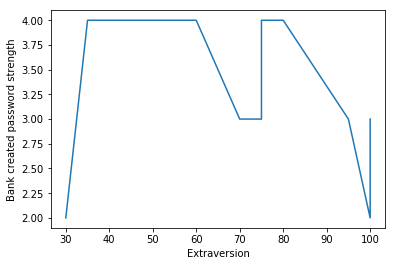

In [80]:
# plt.plot(extraversion_bank_created_passwords.T[1], extraversion_bank_created_passwords.T[0], "ro")
plt.plot(extraversion_bank.T[1], extraversion_bank.T[0])
plt.ylabel('Bank created password strength')
plt.xlabel('Extraversion')
plt.show()

In [81]:
# put the arrays together
extraversion_email = np.array([createdPasswords["email"], personalities["extraversion"]])
extraversion_email = extraversion_email.T

# sort by first column then by second column
extraversion_email = extraversion_email[extraversion_email[:,0].argsort(kind='mergesort')]
extraversion_email = extraversion_email[extraversion_email[:,1].argsort(kind='mergesort')]

print(extraversion_email.T)

[[  2   4   3   2   3   4   4   3   3   4]
 [ 30  35  60  70  75  75  80  95 100 100]]


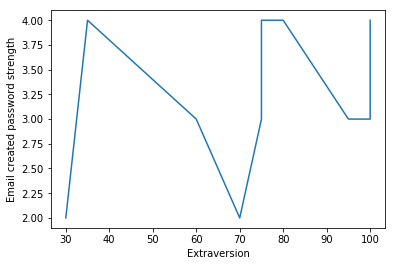

In [82]:
plt.plot(extraversion_email.T[1], extraversion_email.T[0])
plt.ylabel('Email created password strength')
plt.xlabel('Extraversion')
plt.show()

In [83]:
# put the arrays together
intellect_bank = np.array([createdPasswords["bank"], personalities["intellect"]])
intellect_bank = intellect_bank.T

# sort by first column then by second column
intellect_bank = intellect_bank[intellect_bank[:,0].argsort(kind='mergesort')]
intellect_bank = intellect_bank[intellect_bank[:,1].argsort(kind='mergesort')]

print(intellect_bank.T)

[[  4   3   2   3   4   2   4   3   3   4]
 [ 65  70  75  80  85  90  90  95  95 100]]


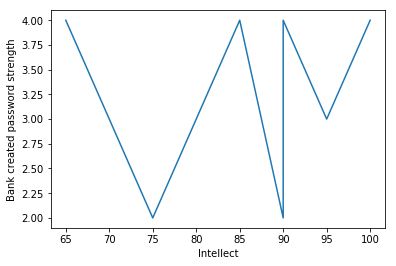

In [87]:
plt.plot(intellect_bank.T[1], intellect_bank.T[0])
plt.ylabel('Bank created password strength')
plt.xlabel('Intellect')
plt.show()

In [85]:
# put the arrays together
intellect_email = np.array([createdPasswords["email"], personalities["intellect"]])
intellect_email = intellect_email.T

# sort by first column then by second column
intellect_email = intellect_email[intellect_email[:,0].argsort(kind='mergesort')]
intellect_email = intellect_email[intellect_email[:,1].argsort(kind='mergesort')]

print(intellect_email.T)

[[  4   3   2   2   4   4   4   3   3   3]
 [ 65  70  75  80  85  90  90  95  95 100]]


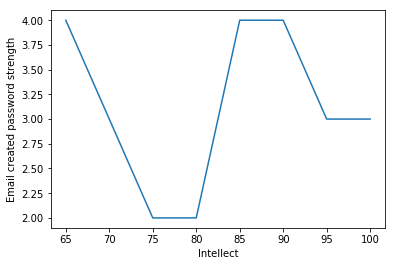

In [86]:
plt.plot(intellect_email.T[1], intellect_email.T[0])
plt.ylabel('Email created password strength')
plt.xlabel('Intellect')
plt.show()

# SELECTION

In [89]:
selectedPasswords = { "bank": [], "email": [] }

for i in range(len(data)):
    
    selectedPasswords["bank"].append(data[i]['bank-password-selection']["score"])
    selectedPasswords["email"].append(data[i]['email-password-selection']["score"])
    
    print(data[i]['bank-password-selection'])
    print(data[i]['email-password-selection'])

{'leak': 'rockyouleak', '_id': '', 'justification': 'The longest one and not a dictionary word', 'password': 'pasteldelimon', 'score': 4}
{'leak': 'rockyouleak', '_id': '', 'justification': "I would rather the one with the numbers only, but knowing the mail system won't accept it, went to what I thought is the second best", 'password': '17defebrero', 'score': 4}
{'leak': 'linkedinleak', '_id': '', 'justification': 'seemed most complex/ hardest to crack', 'password': 'weiliangjin', 'score': 4}
{'leak': 'linkedinleak', '_id': '', 'justification': 'uses numbers and letters, very strong', 'password': 'arifin192002', 'score': 4}
{'leak': 'linkedinleak', '_id': '', 'justification': 'it looks random', 'password': 'itisgpoda', 'score': 3}
{'leak': 'linkedinleak', '_id': '', 'justification': 'All of them seemed weak!', 'password': 'Ninoman1', 'score': 2}
{'leak': 'rockyouleak', '_id': '', 'justification': 'Difficult to guess', 'password': '2fast2furious', 'score': 3}
{'leak': 'linkedinleak', '_

In [93]:
print(selectedPasswords)

{'bank': [4, 4, 3, 3, 3, 4, 4, 4, 4, 3], 'email': [4, 4, 2, 4, 4, 4, 4, 4, 4, 4]}


In [94]:
# put the arrays together
intellect_email = np.array([selectedPasswords["email"], personalities["intellect"]])
intellect_email = intellect_email.T

# sort by first column then by second column
intellect_email = intellect_email[intellect_email[:,0].argsort(kind='mergesort')]
intellect_email = intellect_email[intellect_email[:,1].argsort(kind='mergesort')]

print(intellect_email.T)

[[  4   4   2   4   4   4   4   4   4   4]
 [ 65  70  75  80  85  90  90  95  95 100]]


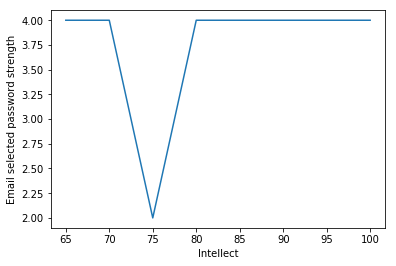

In [100]:
plt.plot(intellect_email.T[1], intellect_email.T[0])
plt.ylabel('Email selected password strength')
plt.xlabel('Intellect')
plt.show()

In [101]:
# put the arrays together
intellect_bank = np.array([selectedPasswords["bank"], personalities["intellect"]])
intellect_bank = intellect_bank.T

# sort by first column then by second column
intellect_bank = intellect_bank[intellect_bank[:,0].argsort(kind='mergesort')]
intellect_bank = intellect_bank[intellect_bank[:,1].argsort(kind='mergesort')]

print(intellect_bank.T)

[[  4   3   3   4   3   4   4   3   4   4]
 [ 65  70  75  80  85  90  90  95  95 100]]


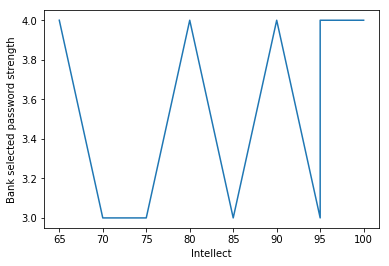

In [102]:
plt.plot(intellect_bank.T[1], intellect_bank.T[0])
plt.ylabel('Bank selected password strength')
plt.xlabel('Intellect')
plt.show()

In [103]:
# put the arrays together
extraversion_email = np.array([selectedPasswords["email"], personalities["extraversion"]])
extraversion_email = extraversion_email.T

# sort by first column then by second column
extraversion_email = extraversion_email[extraversion_email[:,0].argsort(kind='mergesort')]
extraversion_email = extraversion_email[extraversion_email[:,1].argsort(kind='mergesort')]

print(extraversion_email.T)

[[  2   4   4   4   4   4   4   4   4   4]
 [ 30  35  60  70  75  75  80  95 100 100]]


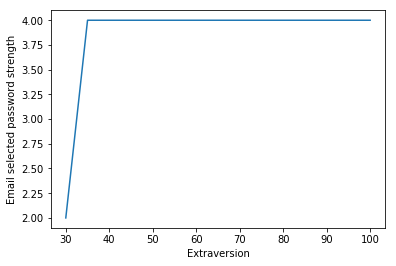

In [107]:
plt.plot(extraversion_email.T[1], extraversion_email.T[0])
plt.ylabel('Email selected password strength')
plt.xlabel('Extraversion')
plt.show()

In [105]:
# put the arrays together
extraversion_bank = np.array([selectedPasswords["bank"], personalities["extraversion"]])
extraversion_bank = extraversion_bank.T

# sort by first column then by second column
extraversion_bank = extraversion_bank[extraversion_bank[:,0].argsort(kind='mergesort')]
extraversion_bank = extraversion_bank[extraversion_bank[:,1].argsort(kind='mergesort')]

print(extraversion_bank.T)

[[  3   4   4   4   3   4   4   3   3   4]
 [ 30  35  60  70  75  75  80  95 100 100]]


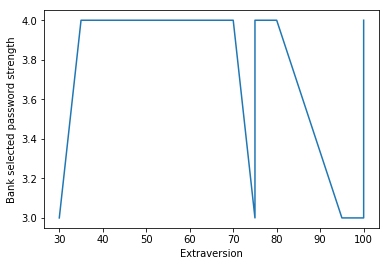

In [110]:
# plt.plot(extraversion_bank_created_passwords.T[1], extraversion_bank_created_passwords.T[0], "ro")
# fig=plt.figure(figsize=(18, 16))
plt.plot(extraversion_bank.T[1], extraversion_bank.T[0])
plt.ylabel('Bank selected password strength')
plt.xlabel('Extraversion')
plt.show()